<a href="https://colab.research.google.com/github/deva237/Task1_Titanic_Dataset_Codsoft/blob/main/codsoft_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1:-** **TITANIC SURVIVAL PREDICTION**

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.


# **Step 1 Load the dataset**

In [ ]:
import pandas as pd

# Load the Titanic dataset
file_path = 'titanic.csv'
titanic_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
titanic_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Step 2 Data Exploration**

In [ ]:
# Checking for missing values in the dataset
missing_values = titanic_df.isnull().sum()

data_description = titanic_df.describe(include='all')


print("Missing Values:\n", missing_values)
print("\nData Description:\n", data_description)


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Description:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000 

# **Step 3 Data preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handling missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.drop(columns=['Cabin'], inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])  # 0 for female, 1 for male
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])  # 0 for C, 1 for Q, 2 for S

# Feature Scaling
scaler = StandardScaler()
titanic_df[['Age', 'Fare']] = scaler.fit_transform(titanic_df[['Age', 'Fare']])

# Display the first few rows of the processed dataset
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,2


# **Step 4 feature selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target variable (y)
X = titanic_df.drop(['Survived', 'Name', 'Ticket'], axis=1) # Dropping non-numerical columns 'Name' and 'Ticket'
y = titanic_df['Survived']

# Apply MinMaxScaler to ensure non-negative values
scaler = MinMaxScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

# Apply SelectKBest with chi-squared test to select top k features
k = 5  # Number of top features to select
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

print("Selected Features:", selected_features)

Selected Features: Index(['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked'], dtype='object')


# **Step 5 split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 6 model building**

In [ ]:
# Random Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

# **Step 7 Model evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.8156424581005587
Precision: 0.7971014492753623
Recall: 0.7432432432432432

Confusion Matrix:
 [[91 14]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



# **Step 8 make predictions**

In [ ]:
# Example prediction on new data
new_data = [[3, 1, -0.565736, 1, 0, -0.502445, 2]]  # Example data point
prediction = model.predict(new_data)
print("Survived:", prediction[0])


Survived: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Step 9 Visualizations**

**Histogram**

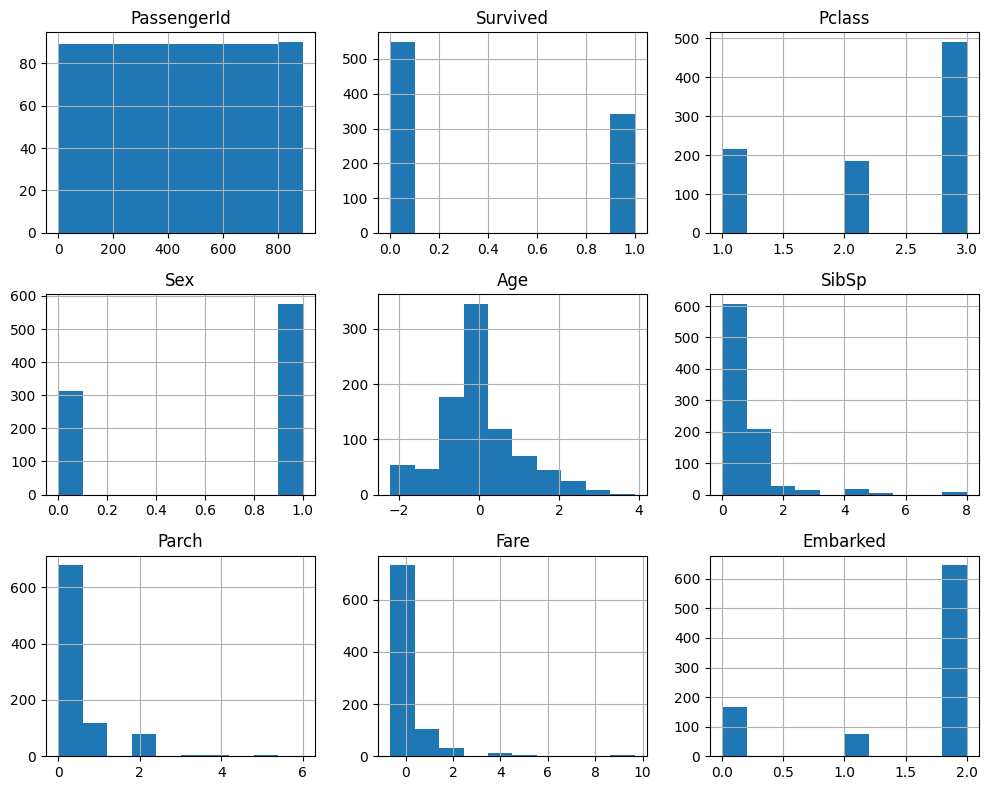

In [ ]:

import matplotlib.pyplot as plt

titanic_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


**Heatmap**

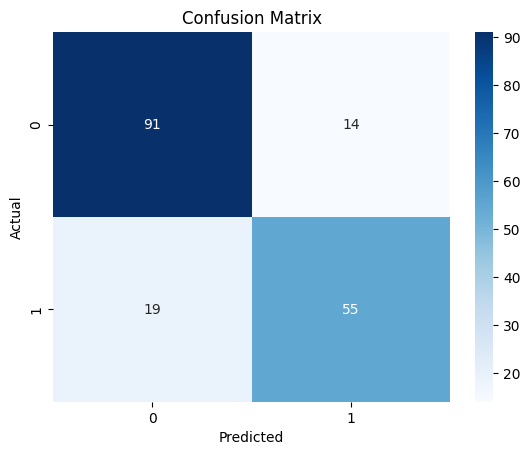

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Piechart**

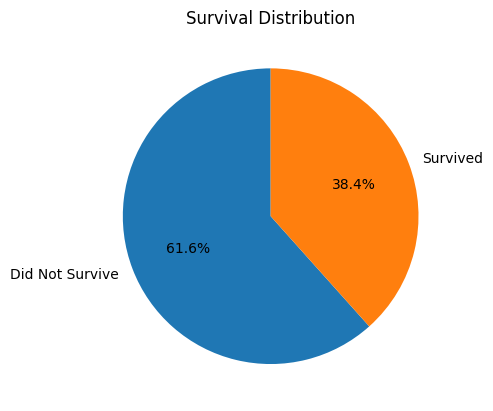

In [ ]:

import matplotlib.pyplot as plt
# Pie chart for survival distribution
survival_counts = titanic_df['Survived'].value_counts()
labels = ['Did Not Survive', 'Survived']
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')
plt.show()


**Barchart**

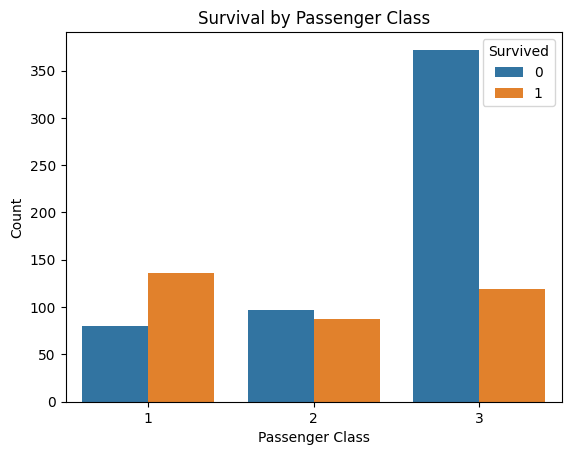

In [ ]:

import matplotlib.pyplot as plt
# Bar chart for survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival by Passenger Class')
plt.show()


**Scatter plot**

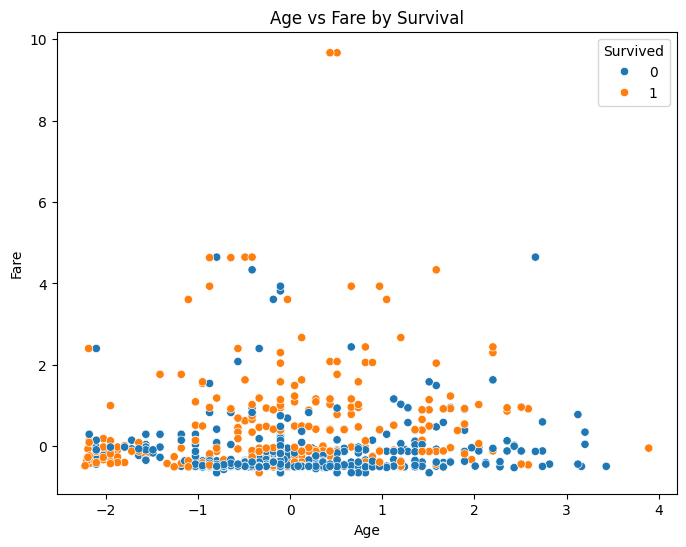

In [ ]:

import matplotlib.pyplot as plt
# Scatter plot for Age vs Fare colored by survival
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df, color='blue')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Survival')
plt.show()
